In [357]:
import requests
import urllib.parse

In [497]:
city = "Kanheri Caves,Mumbai"
address=urllib.parse.quote(city)
country = "India"

In [498]:
url = "https://nominatim.openstreetmap.org/?addressdetails=1&q=" + address + "+" + country +"&format=json&limit=1"

In [499]:
response = requests.get(url).json()
lat=response[0]["lat"]
lon=response[0]["lon"]
ln=600
bd=300
ratio=f"{bd}x{ln}"
zoom="15"
access_token="pk.eyJ1Ijoic2hldHR5a2FyYW41NyIsImEiOiJja3VwNHNuaGwyM242MzNvNnNlMm1obTdyIn0.1zYRiUsXVCn4YMJ94-Ng-Q"
print(lat)
print(lon)


19.225192
72.8838188


In [500]:
def maptype(map):
    api=f"https://api.mapbox.com/styles/v1/mapbox/{map}/static/{lon},{lat},{zoom}/{ratio}?access_token={access_token}"
    return api[0:]



#response = requests.get(maptype("satellite-v9"))
#print(response.url)


In [501]:
# Querying a style with raster layers returns a JPEG
# and save the output as a JPEG image
# Retrieve a map at 72.873722 longitude, 19.211453 latitude, zoom 10.
# Bearing and pitch default to 0
# and save the output as a PNG image.


In [502]:

sample = requests.get(maptype("satellite-v9"))
print(f"Sample Status {sample.status_code}")
dark = requests.get(maptype("dark-v10"))
print(f"Dark Status {dark.status_code}")
light = requests.get(maptype("light-v10"))
print(f"Light Status {light.status_code}")
street = requests.get(maptype("streets-v11"))
print(f"Street Status {street.status_code}")
satellite = requests.get(maptype("satellite-v9"))
print(f"Satellite Status {satellite.status_code}")
street_old = requests.get(maptype("streets-v9"))
print(f"Street Status {street_old.status_code}")
satellite_new = requests.get(maptype("satellite-streets-v9"))
print(f"Satellite_new Status {satellite_new.status_code}")

Sample Status 200
Dark Status 200
Light Status 200
Street Status 200
Satellite Status 200
Street Status 200
Satellite_new Status 200


In [503]:
def file_name(name,file_t):
    file_t = f"/home/karan/Remote-vegetation-sensing/project/sundarbans_data/{file_t}.tiff"
    file = open(file_t[0:], "wb")
    file.write(name.content)
    file.close()
     

file_name(sample,"sample")
file_name(dark,"dark")
file_name(light,"light")
file_name(street,"street")
file_name(street_old,"street_old")
file_name(satellite,"satellite")
file_name(satellite_new,"satellite_new")





In [504]:
from glob import glob

import earthpy as et
import earthpy.spatial as es
import earthpy.plot as ep

import rasterio as rio
from rasterio.plot import plotting_extent
from rasterio.plot import show
from rasterio.plot import reshape_as_raster, reshape_as_image
import xarray as xr
import rioxarray as rxr

import matplotlib.pyplot as plt
import numpy as np
from matplotlib.colors import ListedColormap

import plotly.graph_objects as go

np.seterr(divide='ignore', invalid='ignore')


{'divide': 'ignore', 'over': 'warn', 'under': 'ignore', 'invalid': 'ignore'}

In [505]:
%pwd
%ls

 dark         project/           sample_image.tiff   street_old
 light        sample             satellite           sundarbans_data/
 manage.py*   sample_image.jpg   satellite_new      'test application.ipynb'
 maps/        sample_image.png   street


In [506]:
print('Check files ?:')
for name in glob('/home/karan/Remote-vegetation-sensing/project/sundarbans_data/*.tiff'):
    print(name)

Check files ?:
/home/karan/Remote-vegetation-sensing/project/sundarbans_data/dark.tiff
/home/karan/Remote-vegetation-sensing/project/sundarbans_data/satellite_new.tiff
/home/karan/Remote-vegetation-sensing/project/sundarbans_data/street_old.tiff
/home/karan/Remote-vegetation-sensing/project/sundarbans_data/street.tiff
/home/karan/Remote-vegetation-sensing/project/sundarbans_data/satellite.tiff
/home/karan/Remote-vegetation-sensing/project/sundarbans_data/sample.tiff
/home/karan/Remote-vegetation-sensing/project/sundarbans_data/light.tiff


In [507]:
S_sentinel_bands = glob(r"/home/karan/Remote-vegetation-sensing/project/sundarbans_data/*.tiff")
S_sentinel_bands.sort()
S_sentinel_bands


['/home/karan/Remote-vegetation-sensing/project/sundarbans_data/dark.tiff',
 '/home/karan/Remote-vegetation-sensing/project/sundarbans_data/light.tiff',
 '/home/karan/Remote-vegetation-sensing/project/sundarbans_data/sample.tiff',
 '/home/karan/Remote-vegetation-sensing/project/sundarbans_data/satellite.tiff',
 '/home/karan/Remote-vegetation-sensing/project/sundarbans_data/satellite_new.tiff',
 '/home/karan/Remote-vegetation-sensing/project/sundarbans_data/street.tiff',
 '/home/karan/Remote-vegetation-sensing/project/sundarbans_data/street_old.tiff']

In [508]:
l = []
for i in S_sentinel_bands:
  with rio.open(i, 'r') as f:
    l.append(f.read(1))

In [509]:
arr_st = np.stack(l)

In [510]:
arr_st.shape

(7, 600, 300)

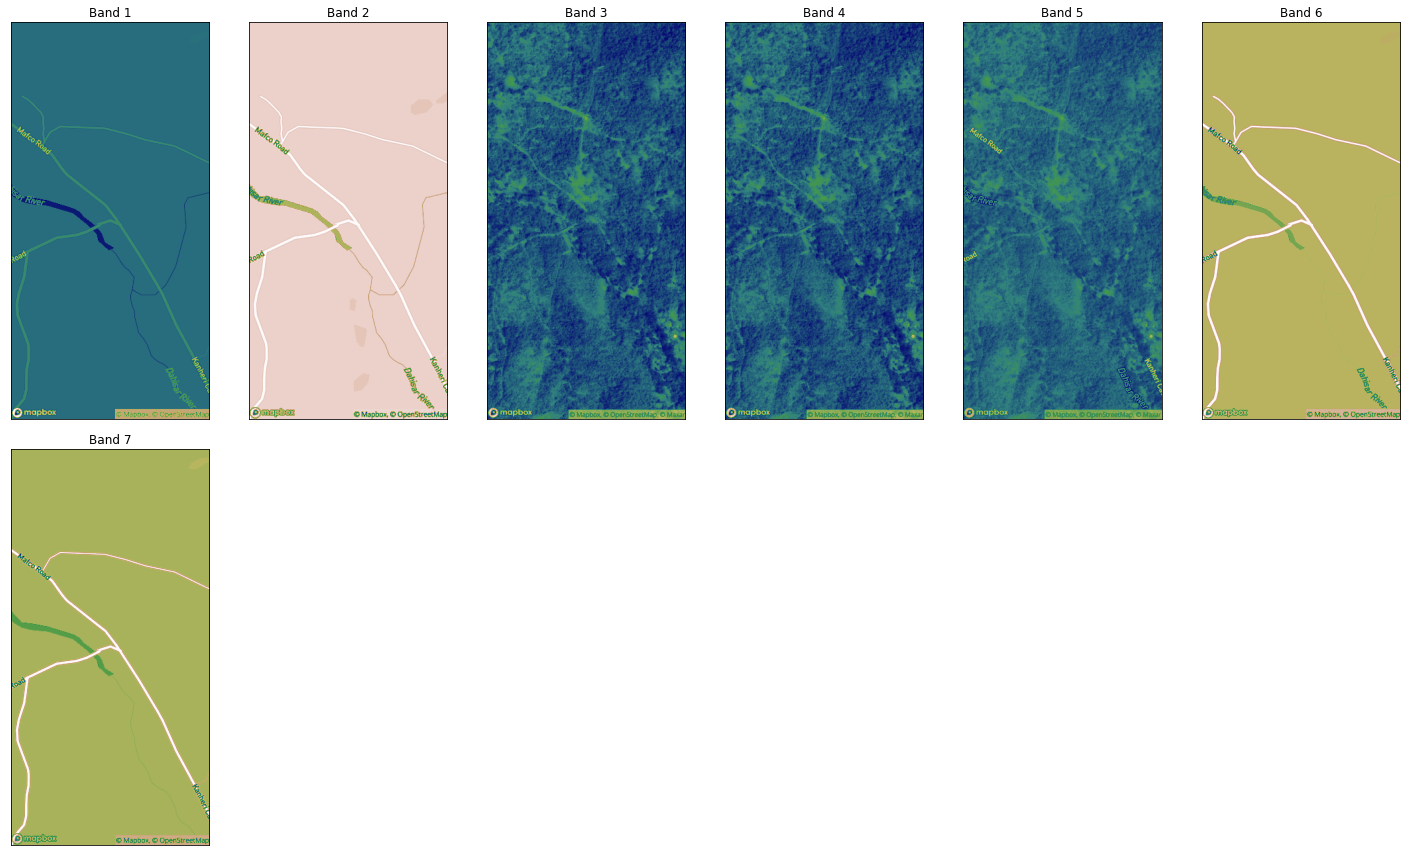

In [511]:
ep.plot_bands(arr_st, cmap = 'gist_earth', figsize = (20, 12), cols = 6, cbar = False)
plt.show()

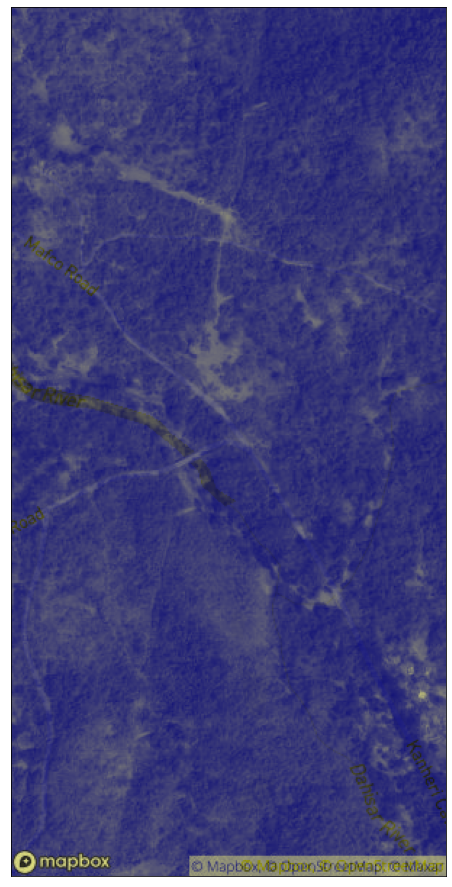

In [512]:
rgb = ep.plot_rgb(arr_st, 
                  rgb=(3,2,1), 
                  figsize=(10, 16), 
                  # title='RGB Composite Image'
                  )

plt.show()

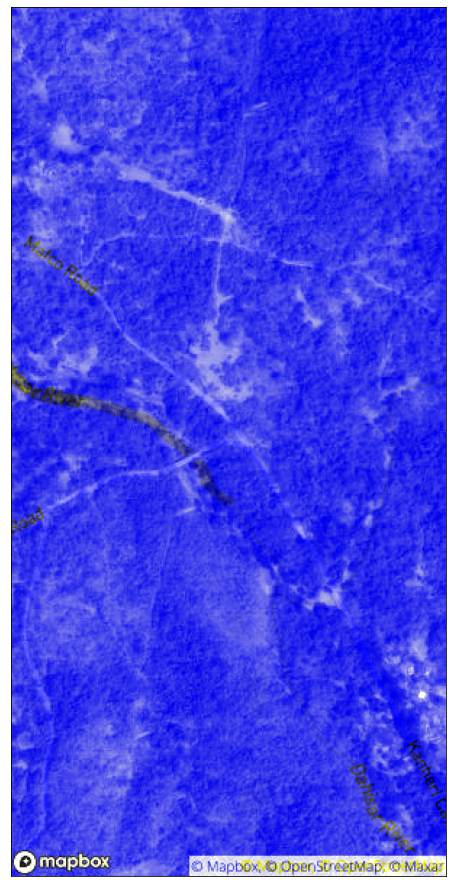

In [513]:
ep.plot_rgb(
    arr_st,
    rgb=(3, 2, 1),
    stretch=True,
    str_clip=0.2,
    figsize=(10, 16),
    # title="RGB Composite Image with Stretch Applied",
)

plt.show()

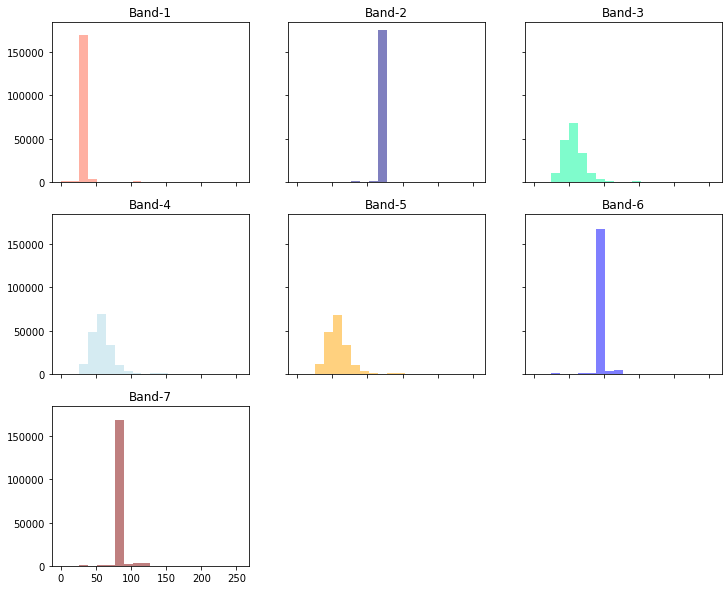

In [514]:
colors = ['tomato', 'navy', 'MediumSpringGreen', 'lightblue', 'orange', 'blue',
          'maroon', 'purple', 'yellow', 'olive', 'brown', 'cyan']

ep.hist(arr_st, 
         colors = colors,
        title=[f'Band-{i}' for i in range(1, 8)], 
        cols=3, 
        alpha=0.5, 
        figsize = (12, 10)
        )

plt.show()

In [515]:
# Preprocessing 

In [516]:
x = np.moveaxis(arr_st, 0, -1)
x.shape

(600, 300, 7)

In [517]:
x.reshape(-1, 7).shape, ln*bd

((180000, 7), 180000)

In [518]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

X_data = x.reshape(-1, 7)

scaler = StandardScaler().fit(X_data)

X_scaled = scaler.transform(X_data)

X_scaled.shape

(180000, 7)

In [519]:
## Principal Component Analysis (PCA)

In [520]:
pca = PCA(n_components = 7)

pca.fit(X_scaled)

data = pca.transform(X_scaled)

In [521]:
data.shape

(180000, 7)

In [522]:
pca.explained_variance_ratio_

array([4.63269204e-01, 3.53131056e-01, 1.15873578e-01, 4.09571444e-02,
       1.69979877e-02, 9.77103094e-03, 2.91946124e-27])

In [523]:
np.sum(pca.explained_variance_ratio_)

1.0

In [524]:
## Visualize Bands after PCA

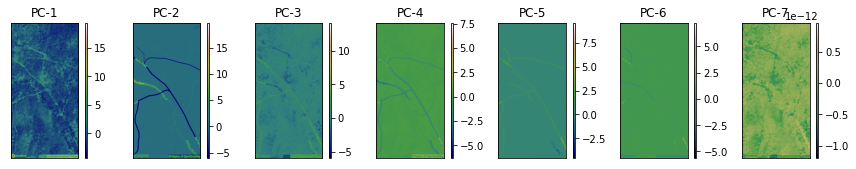

In [525]:
ep.plot_bands(np.moveaxis(data.reshape((ln, bd, data.shape[1])), -1, 0),
              cmap = 'gist_earth',
              cols = 7,
              title = [f'PC-{i}' for i in range(1,8)])

plt.show()

In [526]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters = 7, random_state = 99)
kmeans.fit(data)

KMeans(n_clusters=7, random_state=99)

In [527]:
labels = kmeans.predict(data)

In [528]:
np.unique(labels)

array([0, 1, 2, 3, 4, 5, 6], dtype=int32)

In [529]:
## Visualize Clusters

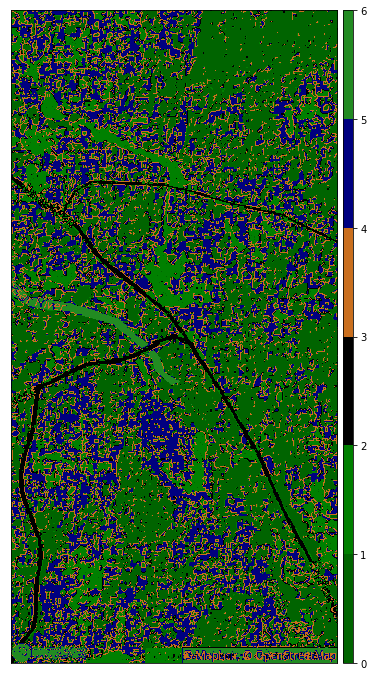

In [530]:
ep.plot_bands(labels.reshape(ln, bd), cmap=ListedColormap(['darkgreen', 'green', 'black', '#CA6F1E', 'navy', 'forestgreen',]))
plt.show()

In [531]:
import plotly.express as px

fig = px.imshow(labels.reshape(ln, bd), 
          color_continuous_scale = ['darkgreen', 'green', 'black', '#CA6F1E', 'navy', 'forestgreen'])

fig.update_xaxes(showticklabels=False)

fig.update_yaxes(showticklabels=False)

fig.update_layout(
    autosize=False,
    width=500,
    height=1000,
    margin=dict(
        l=50,
        r=50,
        b=100,
        t=100,
        pad=4
    ),
    # paper_bgcolor="LightSteelBlue",
)